<center><h1>Advanced Visualization</h1></center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Movie-Rating.csv")
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [4]:
df.rename(columns = {"Rotten Tomatoes Ratings %":"Critic_Rating", "Audience Ratings %": "User_Ratings","Budget (million $)":"BudgetMillions", "Year of release":"Year"}, inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Critic_Rating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
User_Ratings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [6]:
# df.Film = df.Film.astype('category')
# df.Genre = df.Genre.astype('category')
# df.info()

In [7]:
df[["Film", "Genre","Year"]] = df[["Film", "Genre", "Year"]].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   Critic_Rating   559 non-null    int64   
 3   User_Ratings    559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Critic_Rating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
User_Ratings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [10]:
sns.set_style("darkgrid")

In [11]:
df.head()

,Film,Genre,Critic_Rating,User_Ratings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


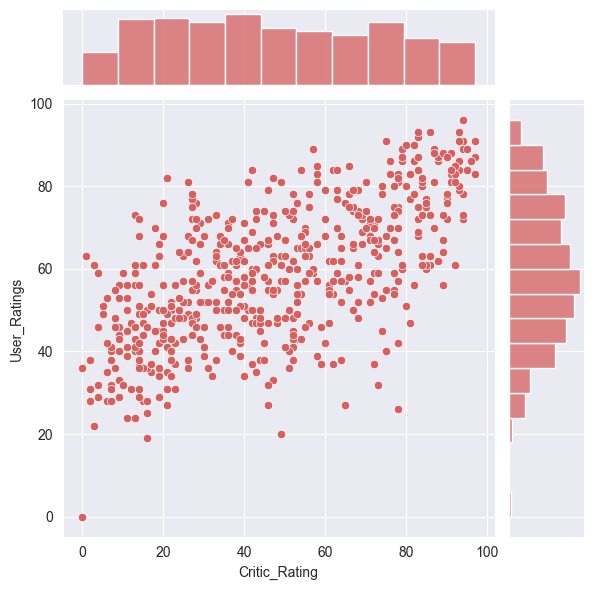

In [12]:
pc = sns.color_palette("muted")
j = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[3])

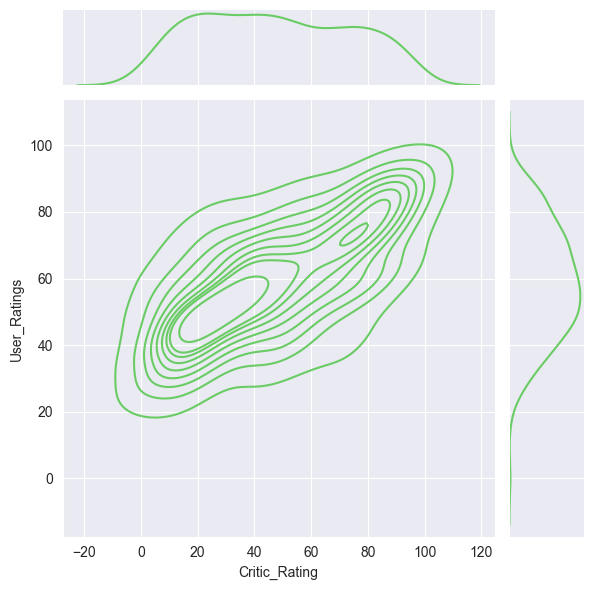

In [13]:
k = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[2], kind = "kde")

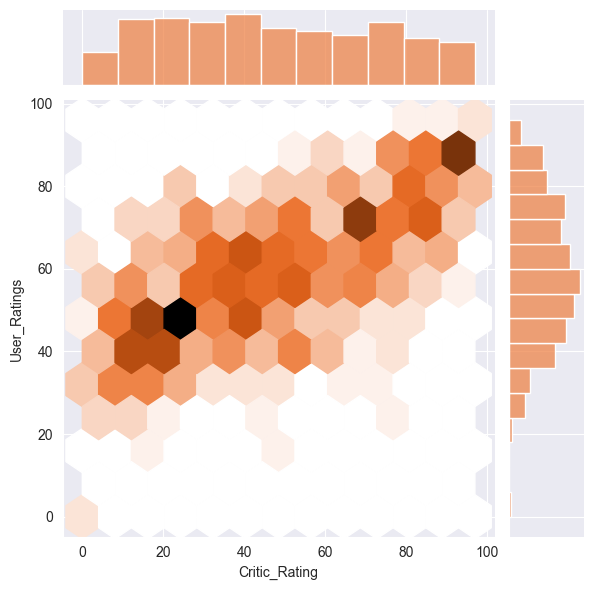

In [14]:
l = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[1], kind = "hex")

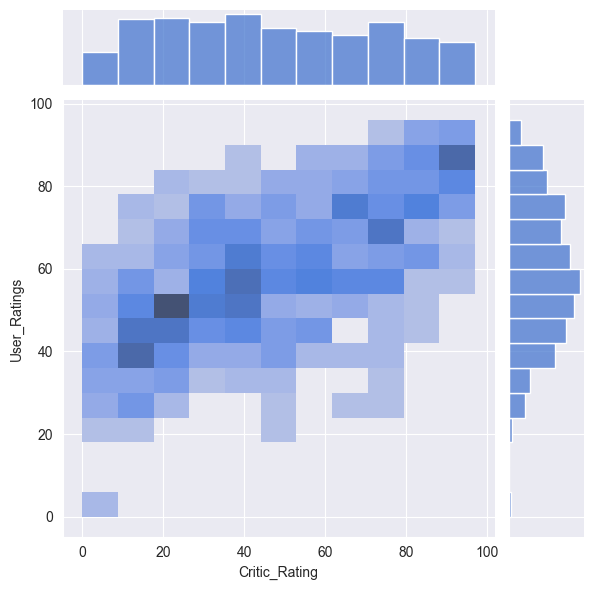

In [15]:
l = sns.jointplot(data = df, x = "Critic_Rating", y = "User_Ratings", color = pc[0], kind = "hist")

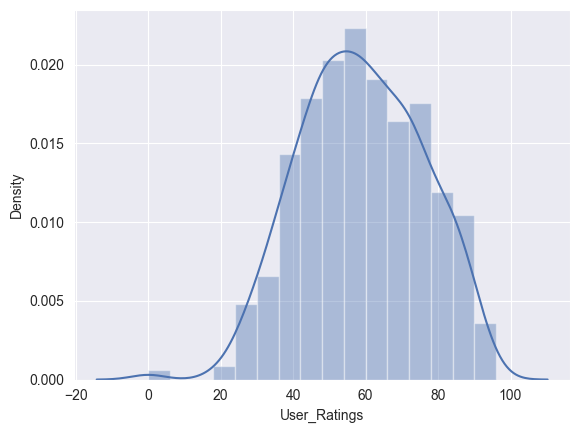

In [16]:
col = sns.color_palette("deep")
n1 = sns.distplot(df.User_Ratings, color = col[0])

<Axes: xlabel='User_Ratings', ylabel='Density'>

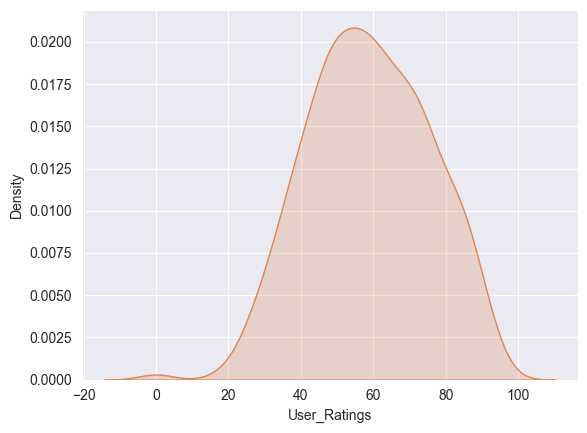

In [17]:
sns.kdeplot(df.User_Ratings, color = col[1], fill = True)

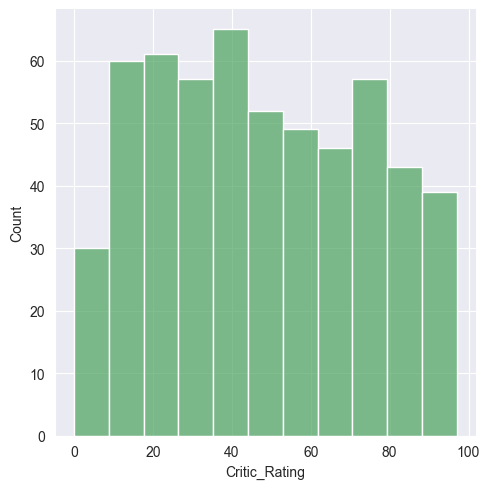

In [18]:
sns.displot(df.Critic_Rating, color = col[2])

<Axes: xlabel='User_Ratings'>

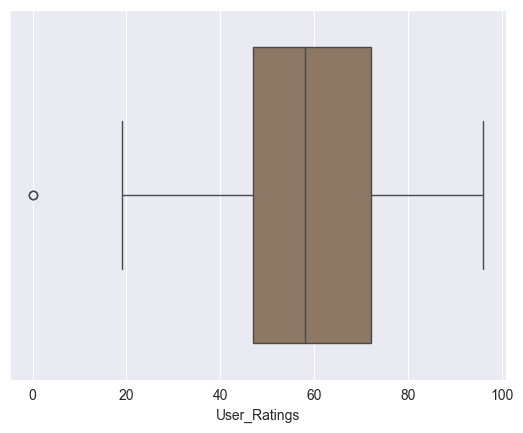

In [19]:
sns.boxplot(x = df.User_Ratings, color = col[5])

<Axes: xlabel='Critic_Rating'>

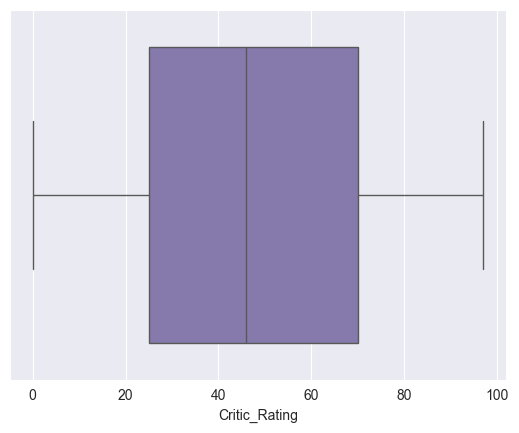

In [20]:
sns.boxplot(x = df.Critic_Rating, color = col[4])

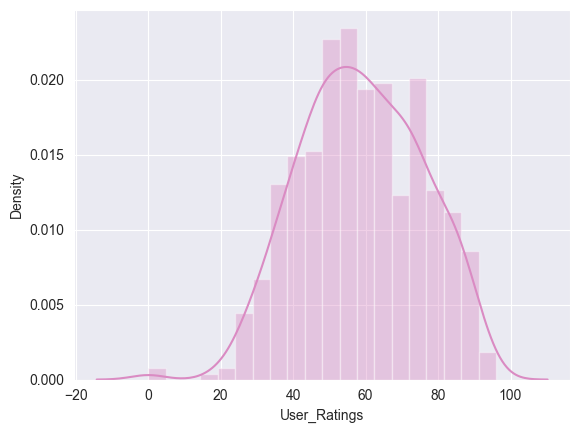

In [21]:
m3 = sns.distplot(df.User_Ratings, color = col[6], bins = 20)

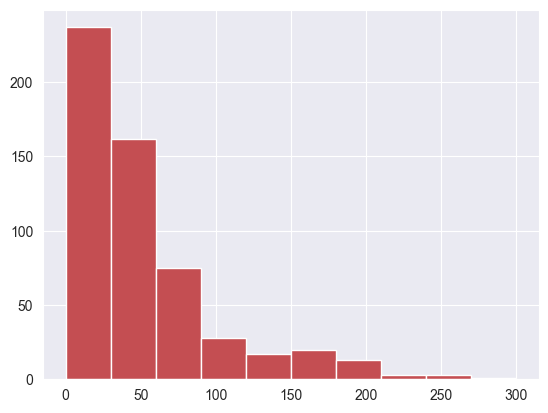

In [22]:
plt.hist(df.BudgetMillions, color = col[3])
plt.show()

# Lesser movies with high budget, more movies with low budget

In [23]:
df.columns

Index(['Film', 'Genre', 'Critic_Rating', 'User_Ratings', 'BudgetMillions',
       'Year'],
      dtype='object')

In [24]:
df.head()

,Film,Genre,Critic_Rating,User_Ratings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


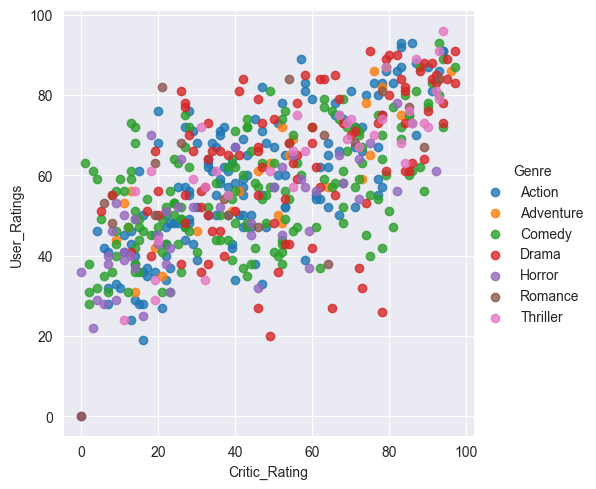

In [25]:

vis = sns.lmplot(data = df, x = 'Critic_Rating', y = "User_Ratings", hue = "Genre", fit_reg= False)

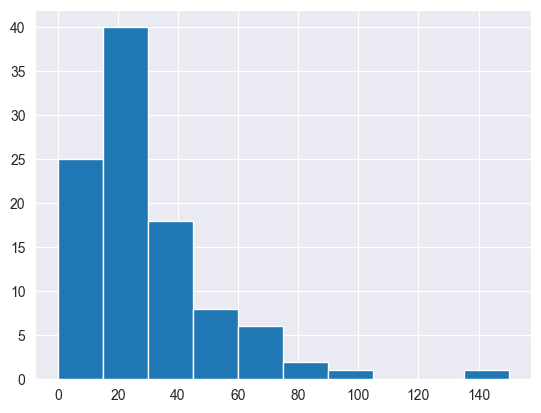

In [26]:
plt.hist(df[df.Genre == "Drama"].BudgetMillions)
plt.show()

In [27]:
df.head()

,Film,Genre,Critic_Rating,User_Ratings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [28]:
df.Genre.unique()


['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

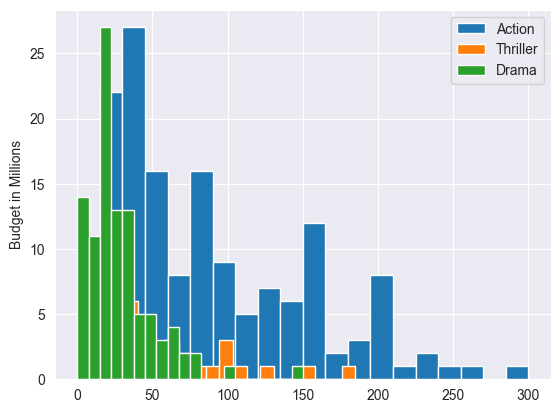

In [29]:
Category = ["Action", "Thriller", "Drama"]

for c in Category:
    plt.hist(df[df.Genre == c].BudgetMillions, bins = 20, label= c)
    

plt.legend()
plt.ylabel("Budget in Millions")    
plt.show()

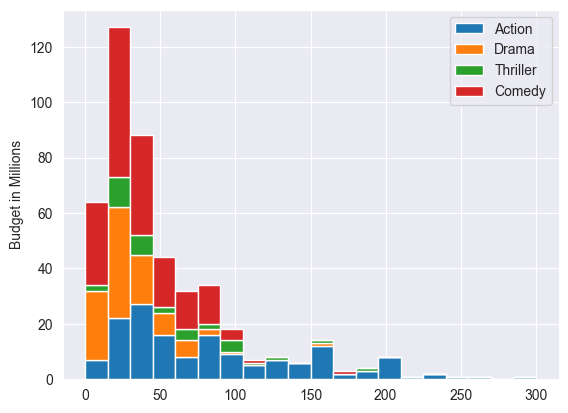

In [30]:
plt.hist([df[df.Genre == "Action"].BudgetMillions,
          df[df.Genre == "Drama"].BudgetMillions,
          df[df.Genre == "Thriller"].BudgetMillions,
          df[df.Genre == "Comedy"].BudgetMillions],
         label =["Action", "Drama","Thriller", "Comedy"],
         bins = 20, stacked = True)
plt.legend()
plt.ylabel("Budget in Millions")
plt.show()

In [31]:
for gen in df.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [32]:
df.columns

Index(['Film', 'Genre', 'Critic_Rating', 'User_Ratings', 'BudgetMillions',
       'Year'],
      dtype='object')

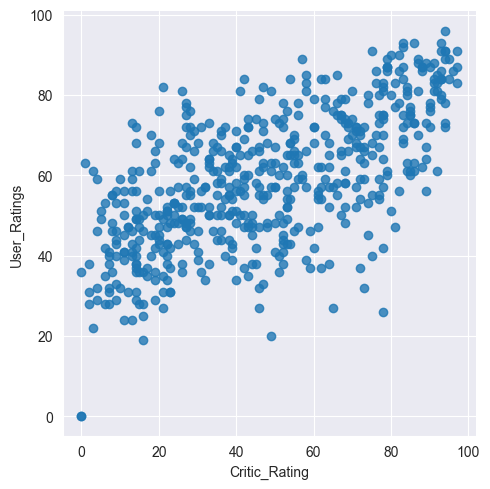

In [33]:
vis1 = sns.lmplot(data = df, x = "Critic_Rating", y = "User_Ratings",
                  fit_reg=False)

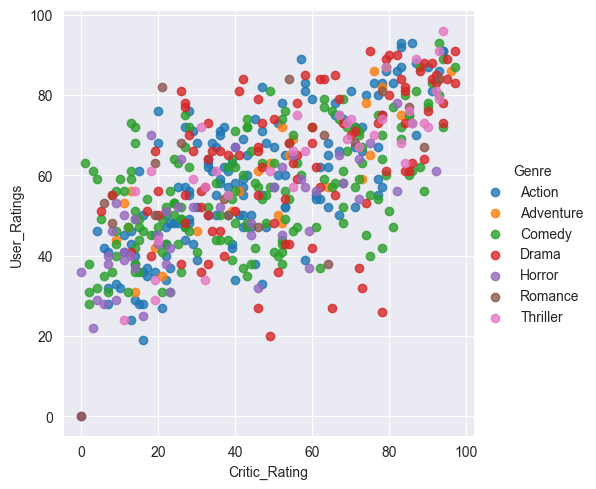

In [34]:
vis2 = sns.lmplot(data = df, x = "Critic_Rating", y = "User_Ratings",
                  fit_reg=False, hue = 'Genre')

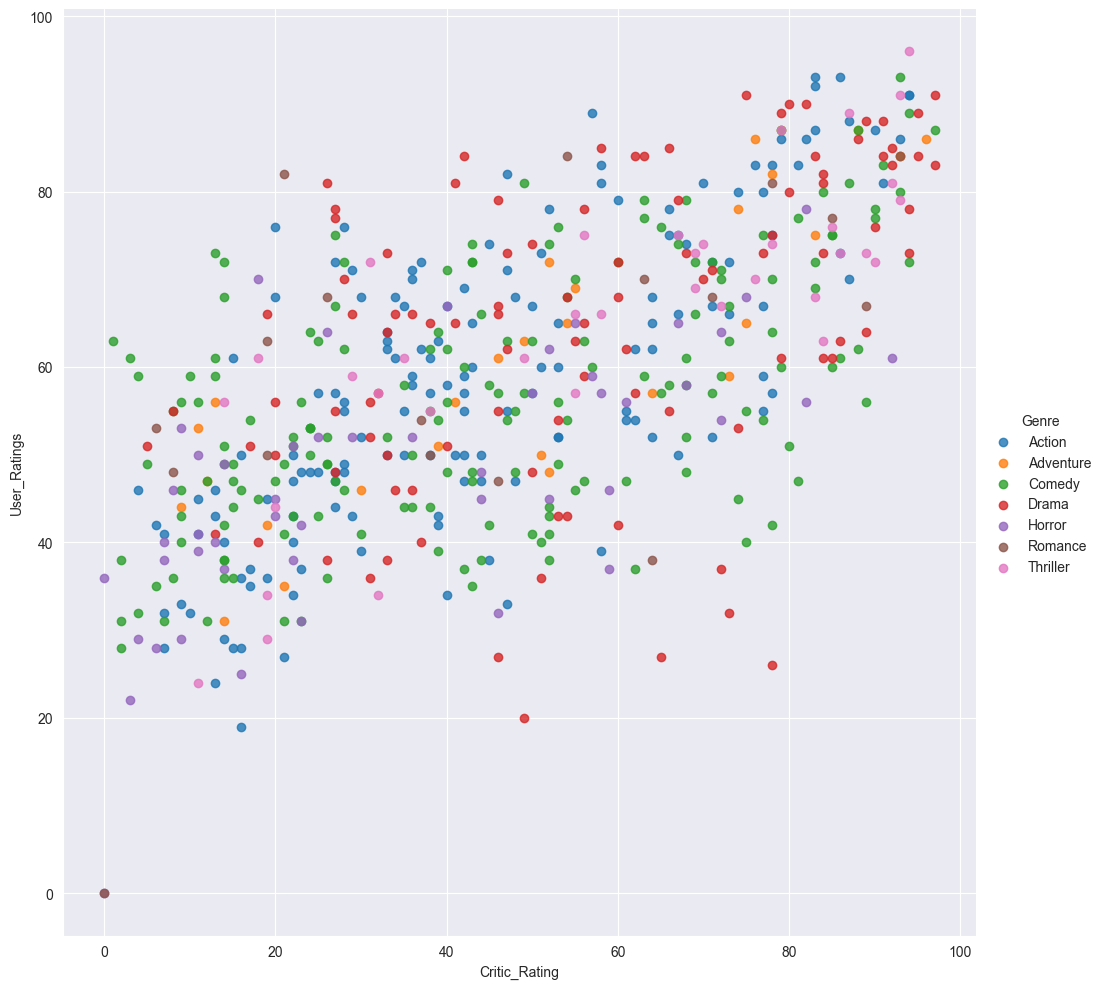

In [35]:
vis3 = sns.lmplot(data = df, x = "Critic_Rating", y = "User_Ratings", 
                  fit_reg= False, hue = "Genre", height = 10, aspect = 1)

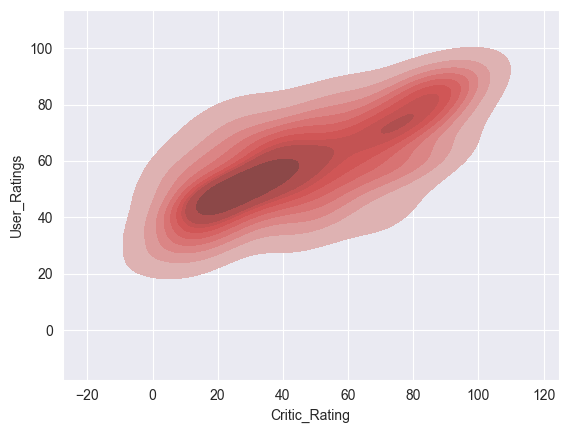

In [36]:
k1 = sns.kdeplot(data = df, x = 'Critic_Rating' , y = 'User_Ratings', color=pc[3], fill=True)

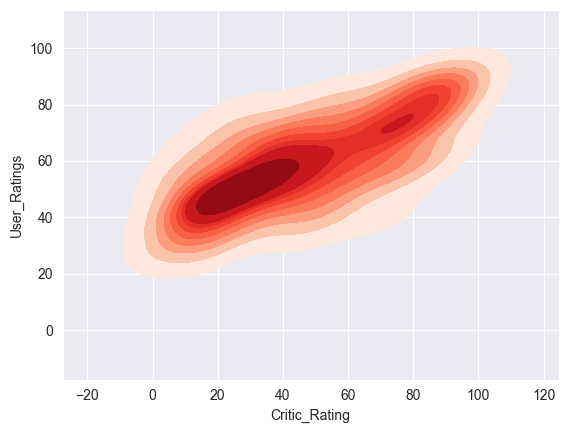

In [37]:
k1 = sns.kdeplot(data = df, x = 'Critic_Rating' , y = 'User_Ratings', shade = True, shade_lowest = False, cmap = "Reds")

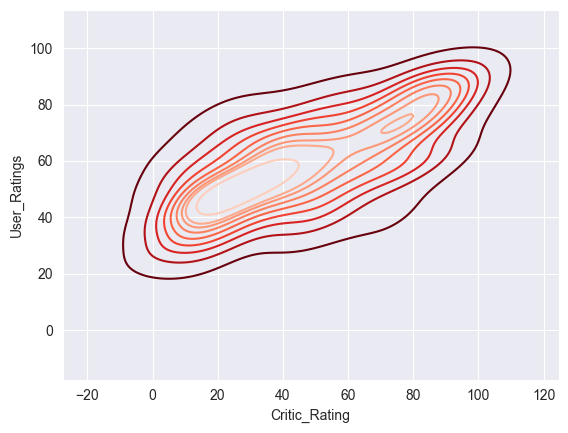

In [42]:
k2 = sns.kdeplot(data = df, x = "Critic_Rating", y = "User_Ratings", shade_lowest = False, cmap = "Reds_r")

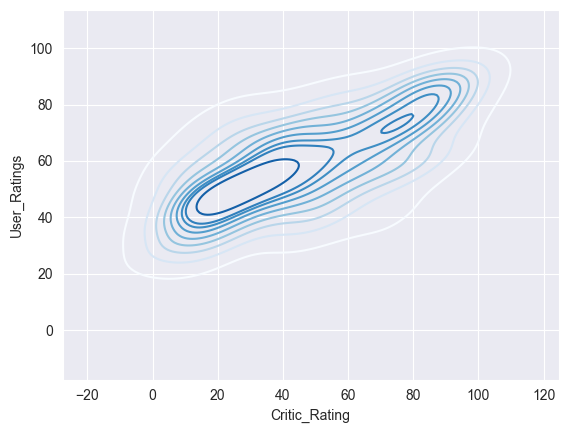

In [ ]:
k2 = sns.kdeplot(data = df, x = "Critic_Rating", y = "User_Ratings",cmap = "Blues")

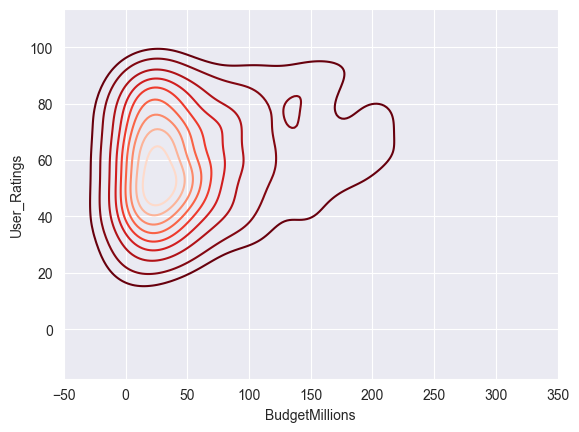

In [50]:
sns.set_style("darkgrid")
k1 = sns.kdeplot(x = df.BudgetMillions, y = df.User_Ratings, shade_lowest = False, cmap = "Reds_r")

In [44]:
df.columns

Index(['Film', 'Genre', 'Critic_Rating', 'User_Ratings', 'BudgetMillions',
       'Year'],
      dtype='object')

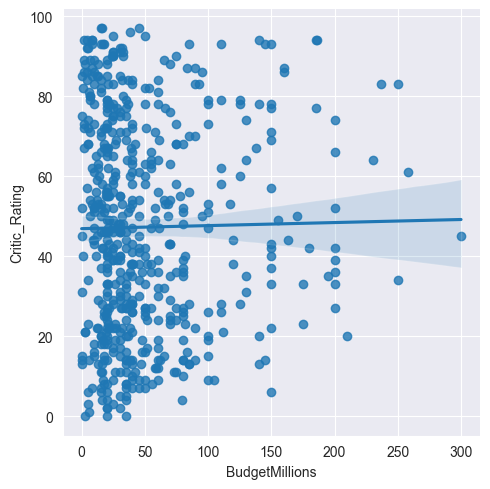

In [56]:
sns.lmplot(data = df ,x = "BudgetMillions", y = "Critic_Rating")

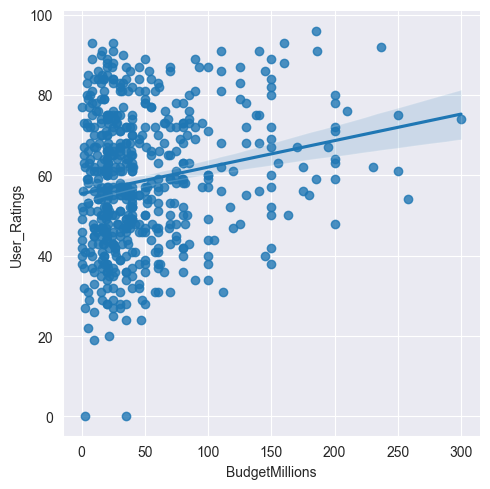

In [57]:
sns.lmplot(data = df ,x = "BudgetMillions", y = "User_Ratings")

<Axes: xlabel='BudgetMillions', ylabel='Critic_Rating'>

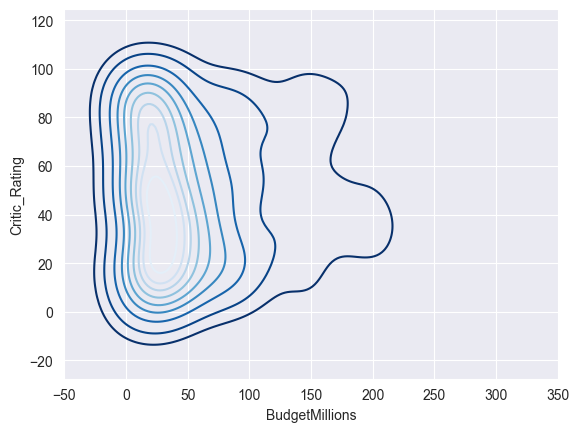

In [63]:
sns.kdeplot(data = df, x = "BudgetMillions", y = "Critic_Rating", cmap = "Blues_r")

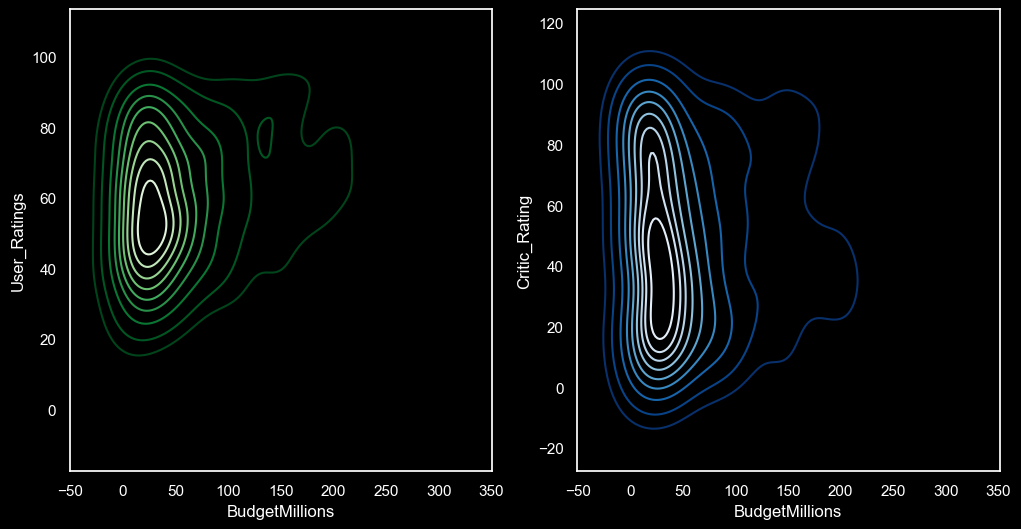

In [173]:
#subplots

f, axes = plt.subplots(1,2, figsize = (12,6))
plt.rcParams['axes.grid'] = False
plt.style.use('dark_background')

k1 = sns.kdeplot(data = df ,x = "BudgetMillions", y = "User_Ratings", cmap= "Greens_r",ax = axes[0])
k2 = sns.kdeplot(data = df, x = "BudgetMillions", y = "Critic_Rating", cmap = "Blues_r", ax = axes[1])
# sns.set_style("dark",{"a.facecolor":"black", "f.facecolor":"black"})

 

<Axes: xlabel='BudgetMillions', ylabel='Critic_Rating'>

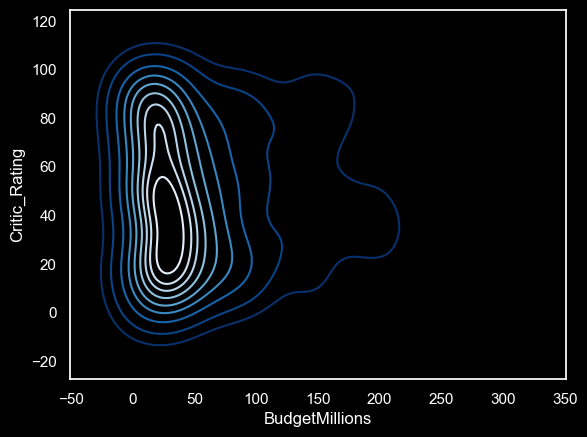

In [168]:
sns.kdeplot(data = df, x = "BudgetMillions", y = "Critic_Rating", cmap = "Blues_r")

In [174]:
axes

array([<Axes: xlabel='BudgetMillions', ylabel='User_Ratings'>,
       <Axes: xlabel='BudgetMillions', ylabel='Critic_Rating'>],
      dtype=object)

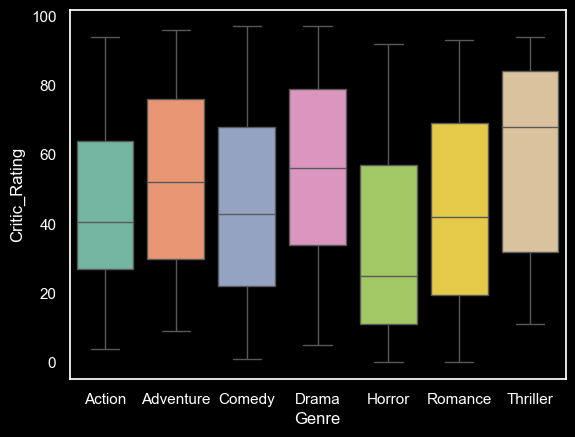

In [182]:
#box plots


box1 = sns.boxplot(data = df, x = "Genre", y = "Critic_Rating", palette= "Set2")

In [224]:
plt.style.use("Solarize_Light2")

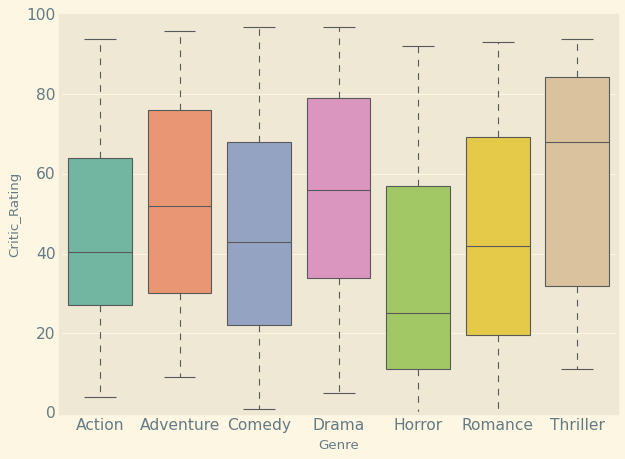

In [225]:
box1 = sns.boxplot(data = df, x = "Genre", y = "Critic_Rating", palette= "Set2")

In [226]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

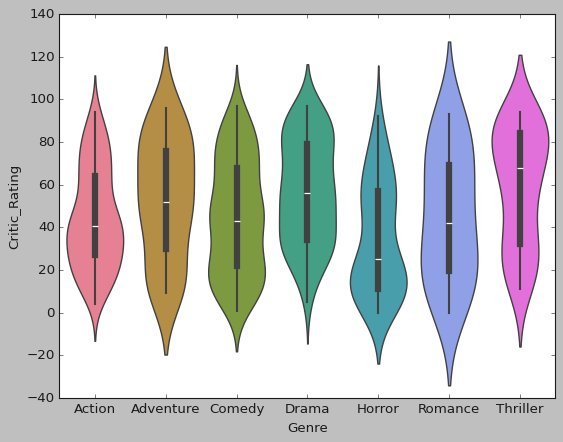

In [231]:
plt.style.use("classic")
vil = sns.violinplot(data = df, x = "Genre", y = "Critic_Rating", palette = "husl")

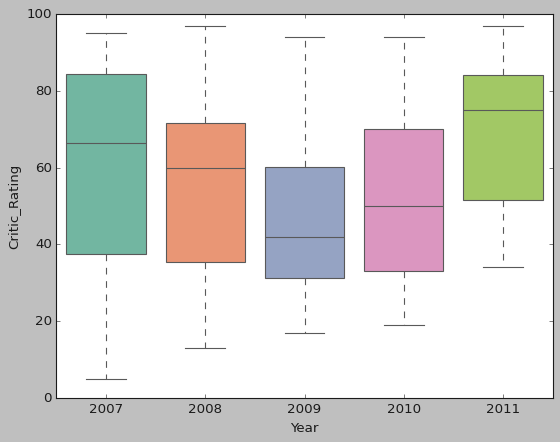

In [236]:
vil2 = sns.boxplot(data = df[df.Genre=="Drama"], x="Year", y = "Critic_Rating", palette= "Set2")

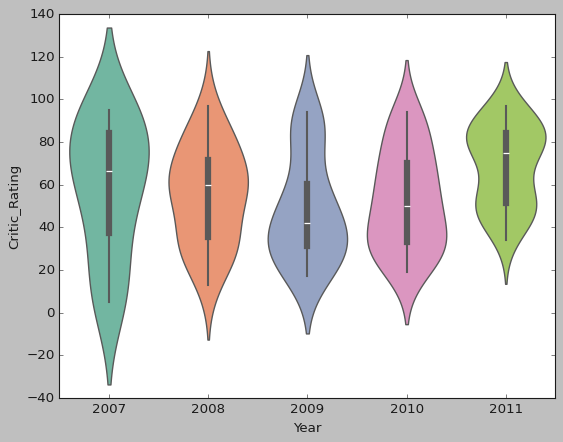

In [238]:
dfvil2 = sns.violinplot(data = df[df.Genre=="Drama"], x="Year", y = "Critic_Rating", palette= "Set2")

In [239]:
#Facet Grid

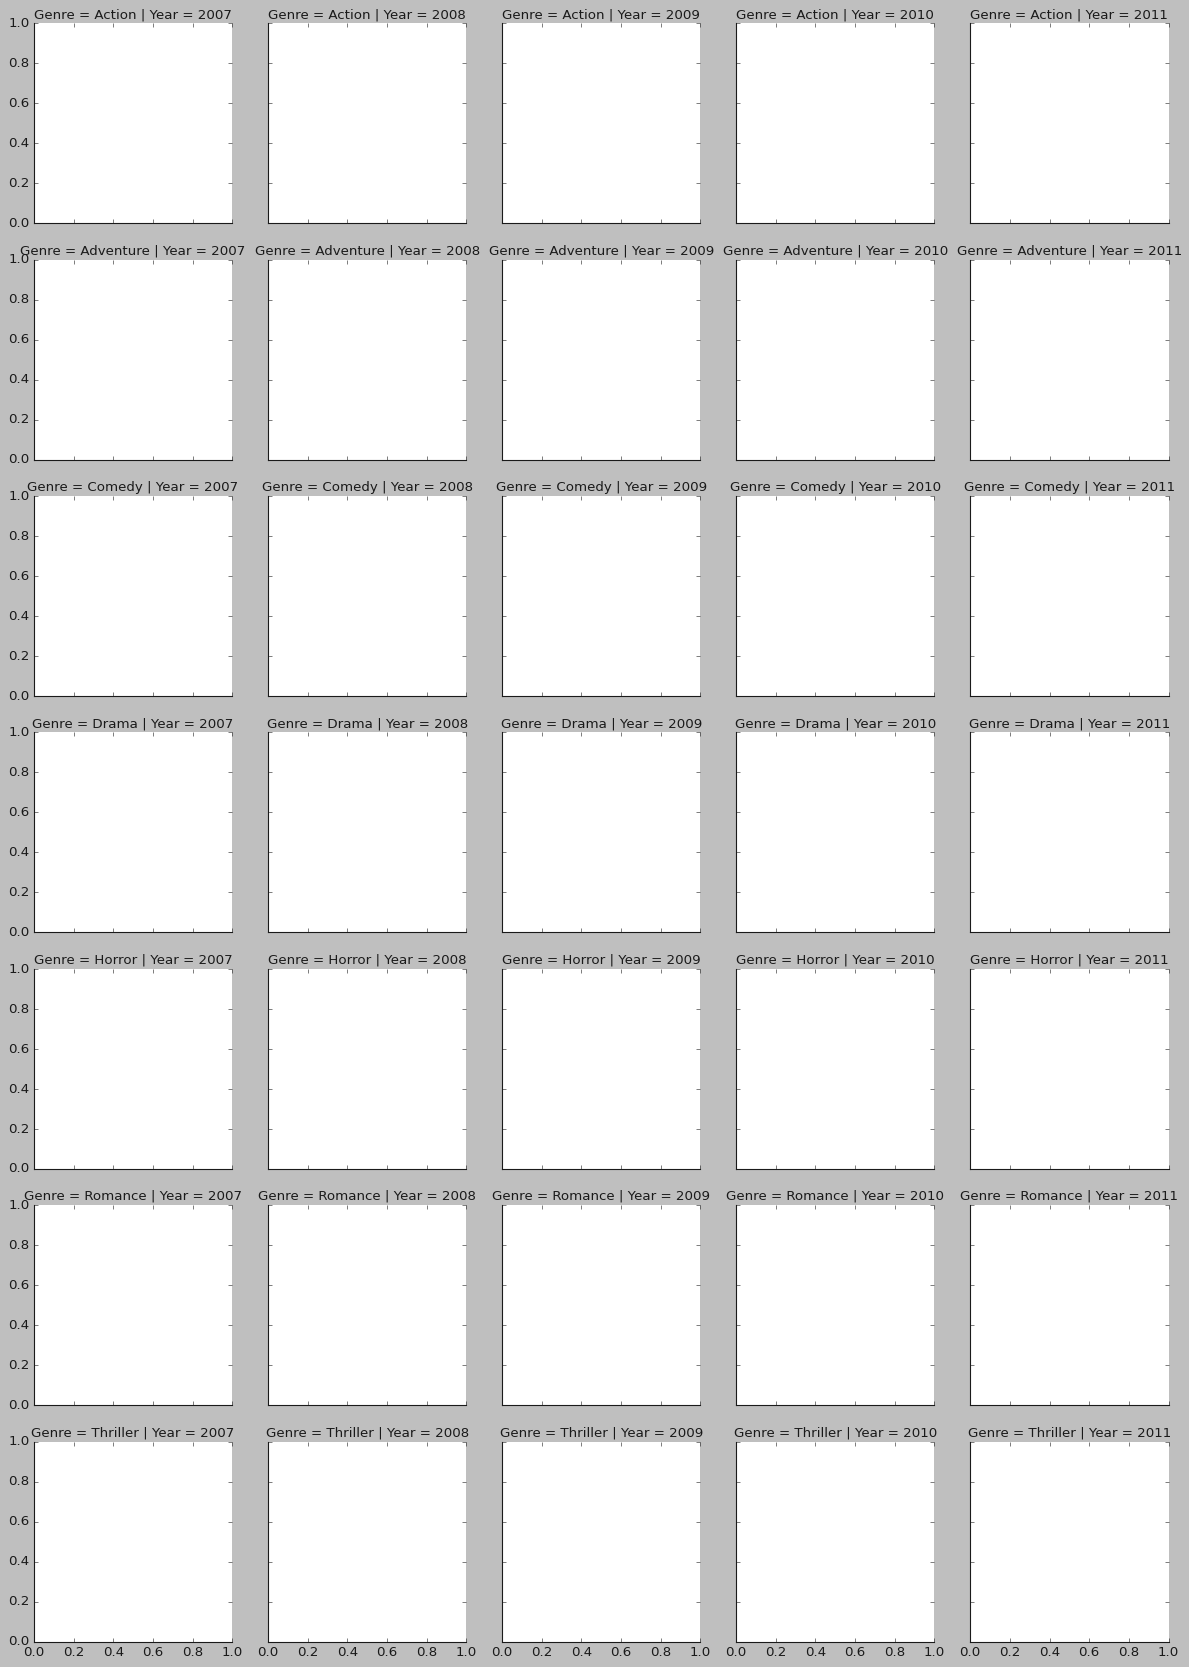

In [240]:
g = sns.FacetGrid(df, row = "Genre", col = "Year", hue = "Genre")

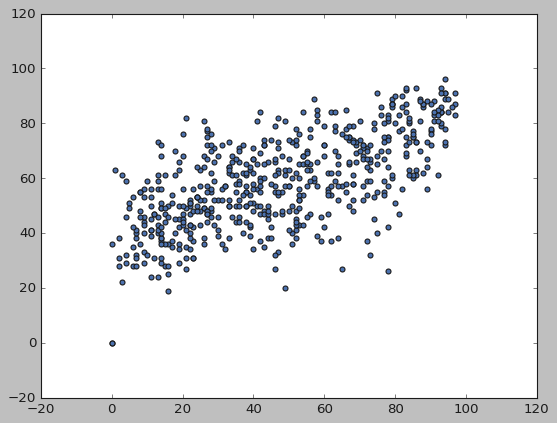

In [ ]:
plt.scatter(x = df.Critic_Rating, y = df.User_Ratings)

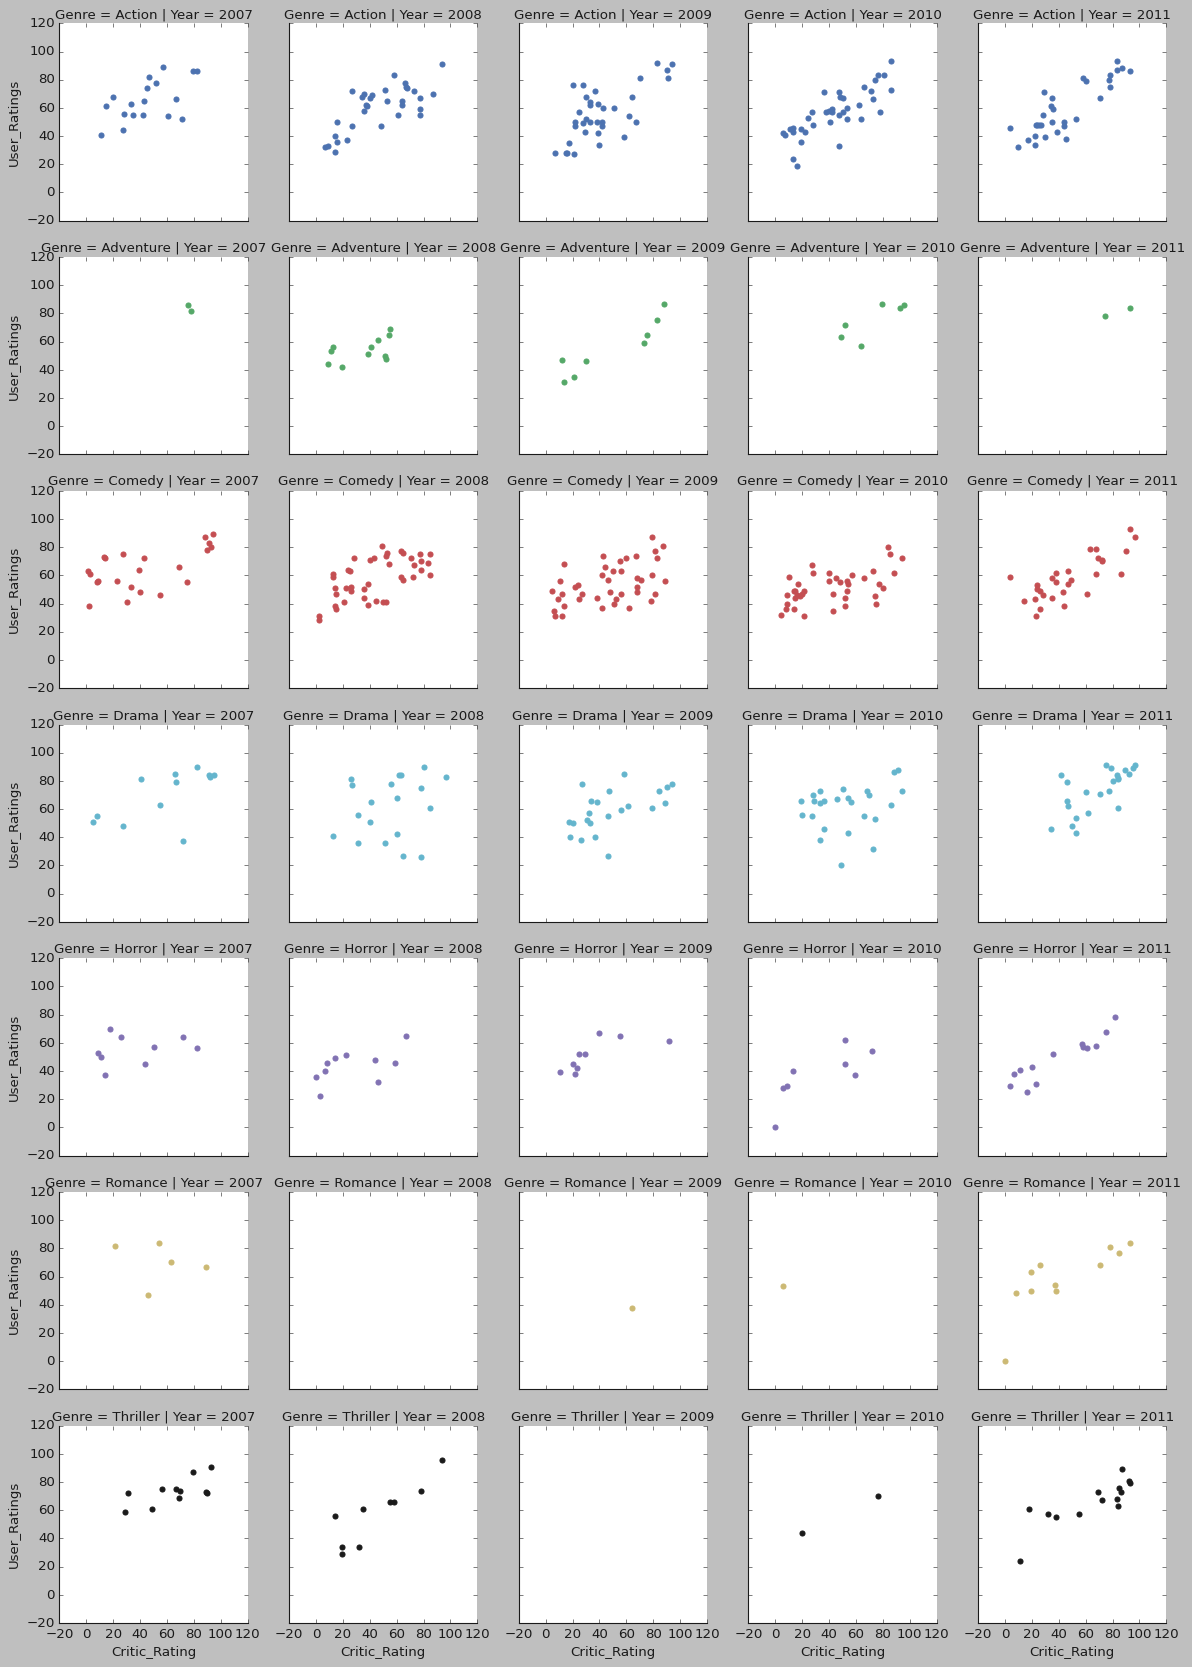

In [243]:
facet = sns.FacetGrid(df, row = "Genre", col = "Year", hue = "Genre")
g = g.map(plt.scatter, "Critic_Rating" ,"User_Ratings")

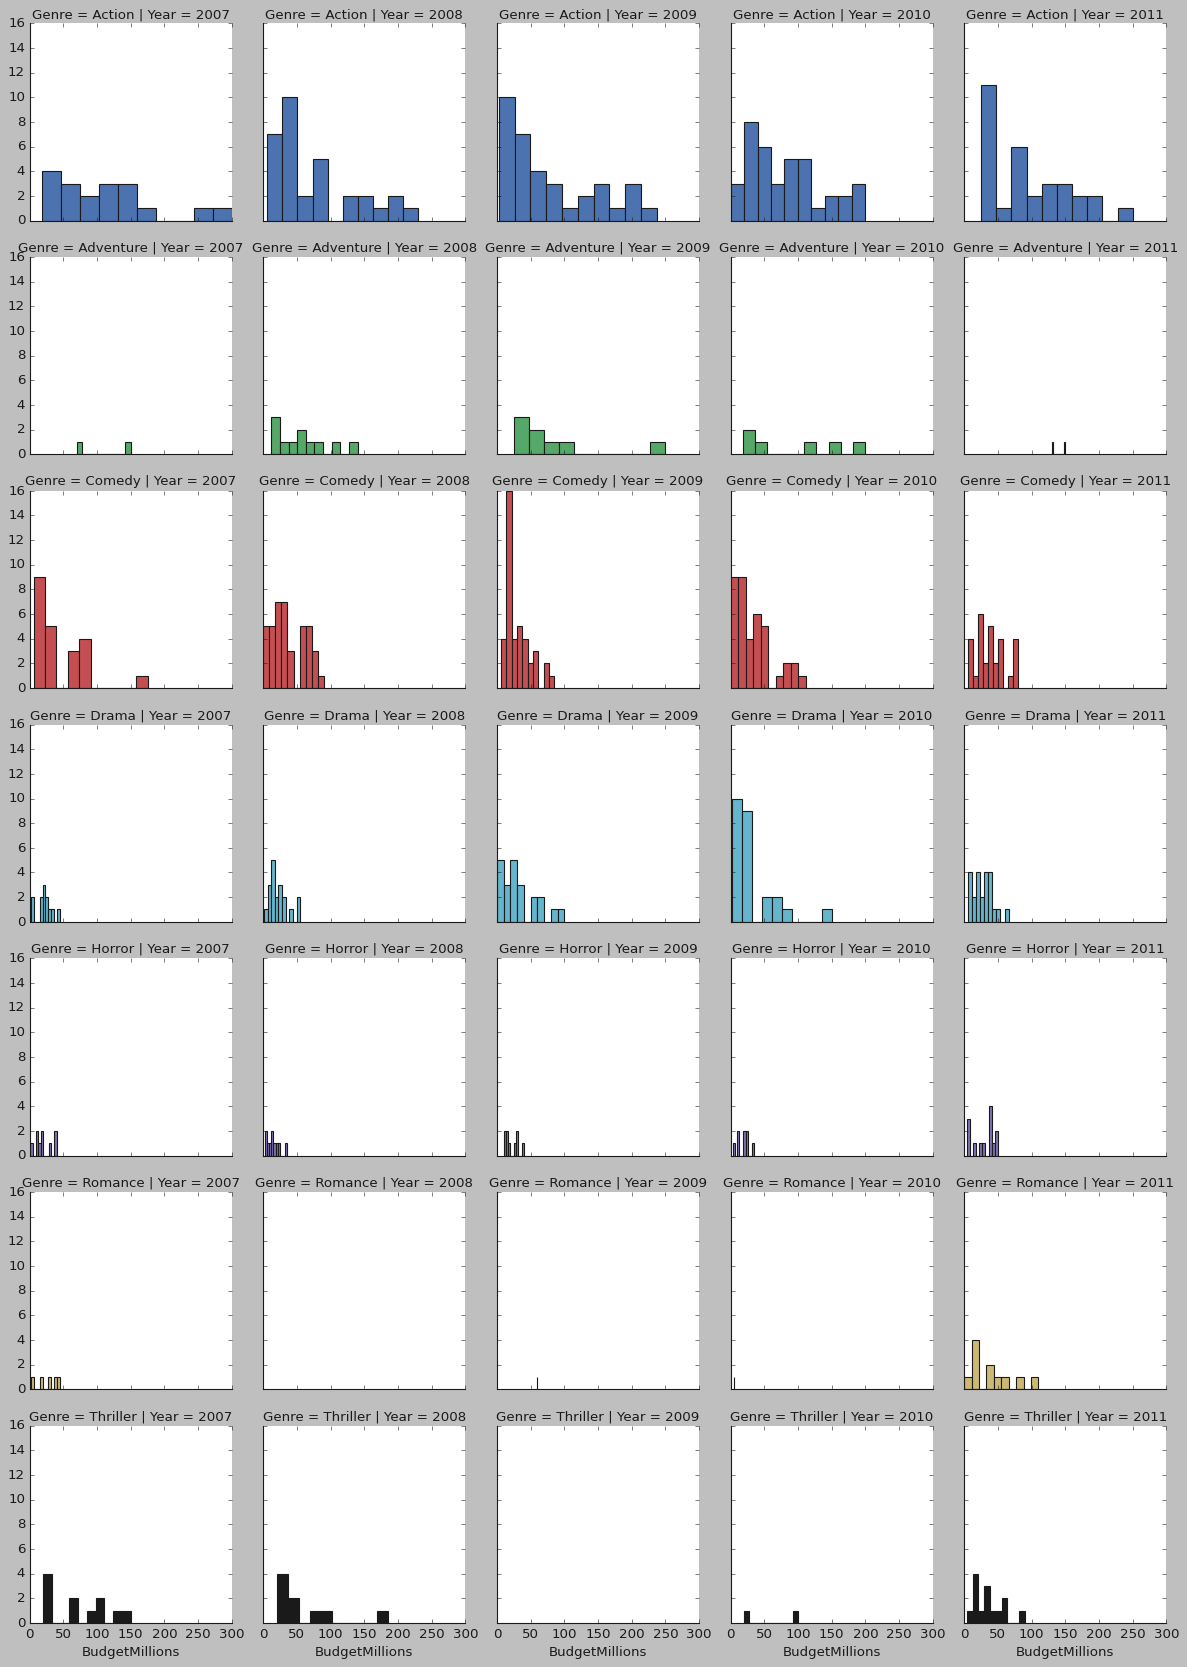

In [244]:
g = sns.FacetGrid(df, row = "Genre", col = "Year", hue = "Genre")
g = g.map(plt.hist, "BudgetMillions")

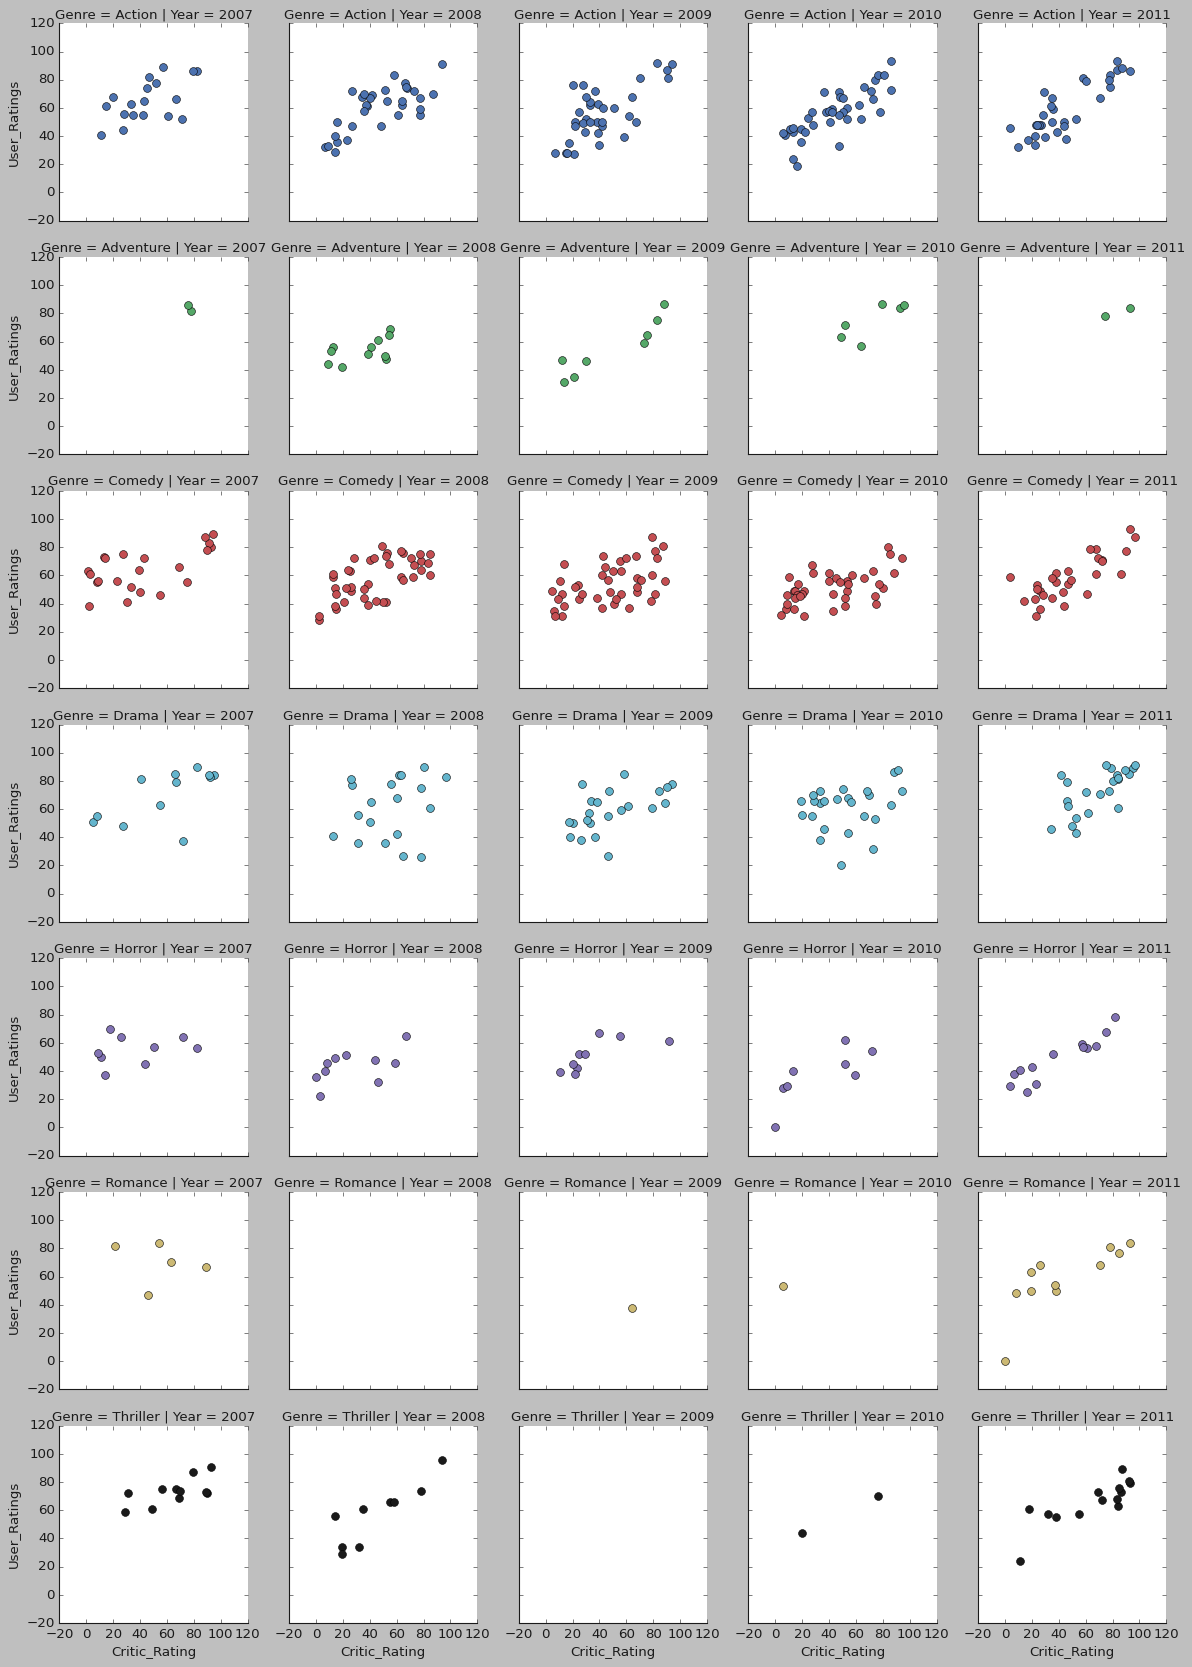

In [246]:
g = sns.FacetGrid(df, row = "Genre", col = "Year", hue = "Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")
g = g.map(plt.scatter, 'Critic_Rating', "User_Ratings", **kws)

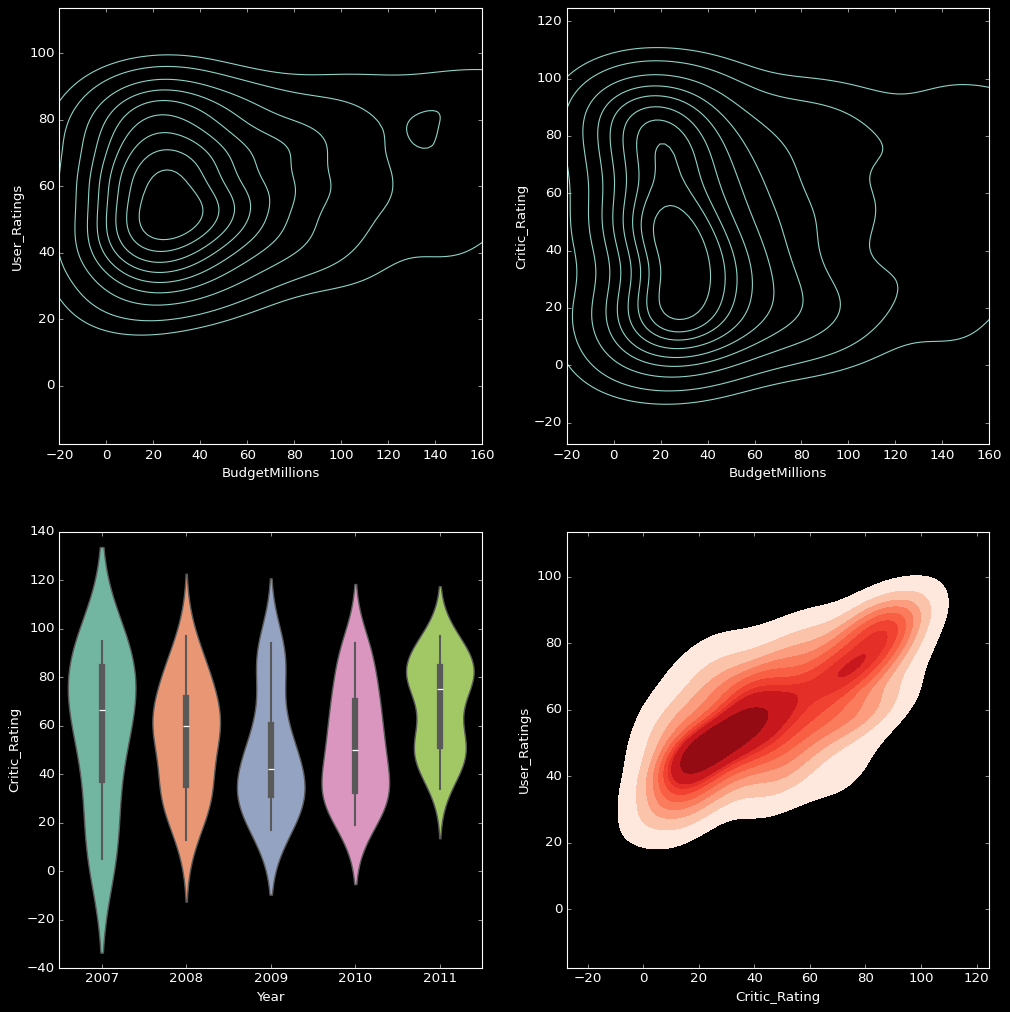

In [252]:
#Python is not a vectorized programming language
#Building dashboards  (dashboard - combination of charts and insights)

plt.style.use('dark_background')
f, axes = plt.subplots(2,2, figsize = (15,15))

k1 = sns.kdeplot(x = df.BudgetMillions, y = df.User_Ratings, ax = axes[0,0] )
k2 = sns.kdeplot(x = df.BudgetMillions, y = df.Critic_Rating, ax = axes[0,1])

k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))

k3 = sns.violinplot(data = df[df.Genre == "Drama"], x = "Year", y = "Critic_Rating",palette="Set2", ax = axes[1,0])
k4 = sns.kdeplot(x = df.Critic_Rating, y = df.User_Ratings, shade = True, shade_lowest = False, cmap = "Reds", ax = axes[1,1])
plt.show()

In [255]:
df.columns

Index(['Film', 'Genre', 'Critic_Rating', 'User_Ratings', 'BudgetMillions',
       'Year'],
      dtype='object')

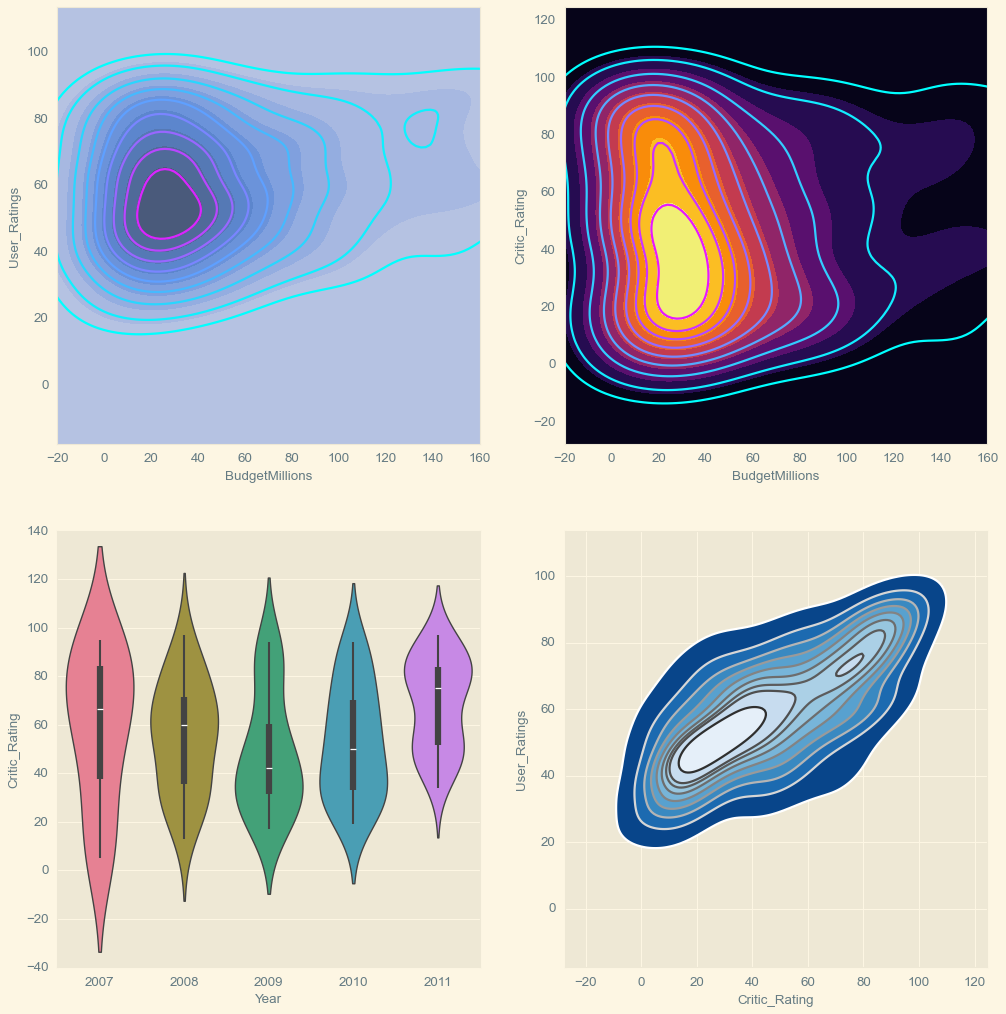

In [278]:
#Style your dashboard using different color map 
#dashboards = Combination of charts


# sns.set_style("dark", {"axes.facecolor":"black"})
plt.style.use("Solarize_Light2")
f, axes = plt.subplots(2,2, figsize = (15,15))


k1 = sns.kdeplot(x = df.BudgetMillions, y = df.User_Ratings,
                 shade = True, shade_lowest = True, 
                 ax = axes[0,0])

k1b = sns.kdeplot(x = df.BudgetMillions, y = df.User_Ratings, cmap = "cool", ax = axes[0,0])

k2 = sns.kdeplot(x = df.BudgetMillions, y = df.Critic_Rating, 
                 shade = True, shade_lowest = True, cmap = "inferno", 
                 ax = axes[0,1])
k2b = sns.kdeplot(x = df.BudgetMillions, y = df.Critic_Rating,
                  cmap = 'cool', ax = axes[0,1])


k3 = sns.violinplot(data = df[df.Genre == "Drama"], 
                    x = "Year", y = "Critic_Rating", ax = axes[1,0], palette = "husl")

k4 = sns.kdeplot(x = df.Critic_Rating, y = df.User_Ratings,
                 shade = True, shade_lowest = False, cmap = "Blues_r",
                 ax = axes[1,1])
k4b = sns.kdeplot(x = df.Critic_Rating, y = df.User_Ratings, 
                  cmap = "gist_gray_r", ax = axes[1,1])

k1.set(xlim = (-20, 160))
k2.set(xlim = (-20,160))

plt.show()
